In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, inconsistent
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [124]:
# Load dataset
df = pd.read_csv('vehicles.csv')

In [125]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [126]:
df.shape

(846, 19)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [129]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [130]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [131]:
df.fillna(0, inplace = True)

In [132]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [133]:
columns = [col for col in df.columns if col != 'class']
columns

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

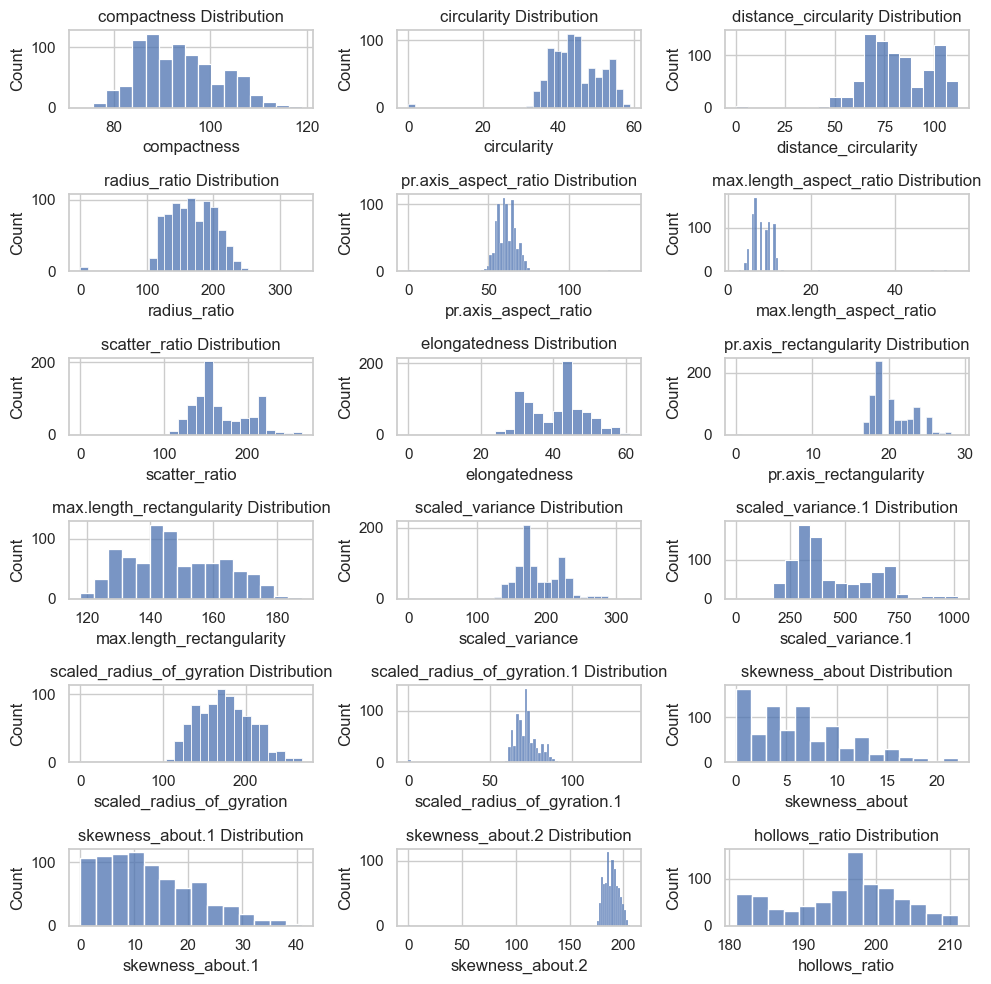

In [134]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(10, 10))

for idx, i in enumerate(columns):
    plt.subplot(6, 3, idx+1)
    sns.histplot(x=i, data=df)
    plt.title(f"{i} Distribution")
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='class'>

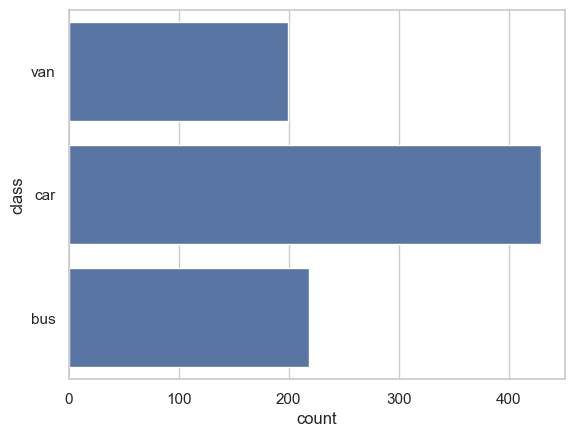

In [28]:
sns.countplot(df['class'])

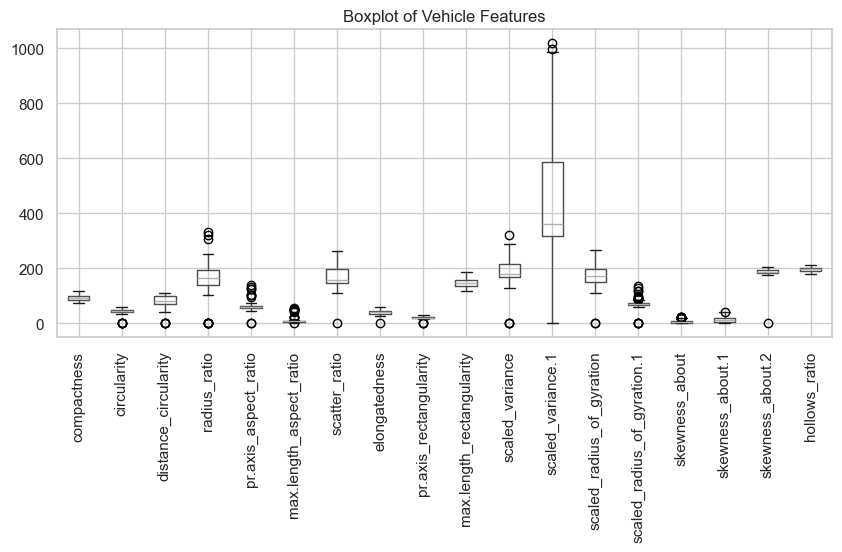

In [33]:
# Boxplot visualization for outlier detection
plt.figure(figsize=(10, 4))
df[columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Vehicle Features')
plt.show()

In [135]:
# from ydata_profiling import ProfileReport

In [136]:
# # Create Profile Report
# profile = ProfileReport(df, explorative=True)

# # Display in Jupyter Notebook
# profile.to_notebook_iframe()

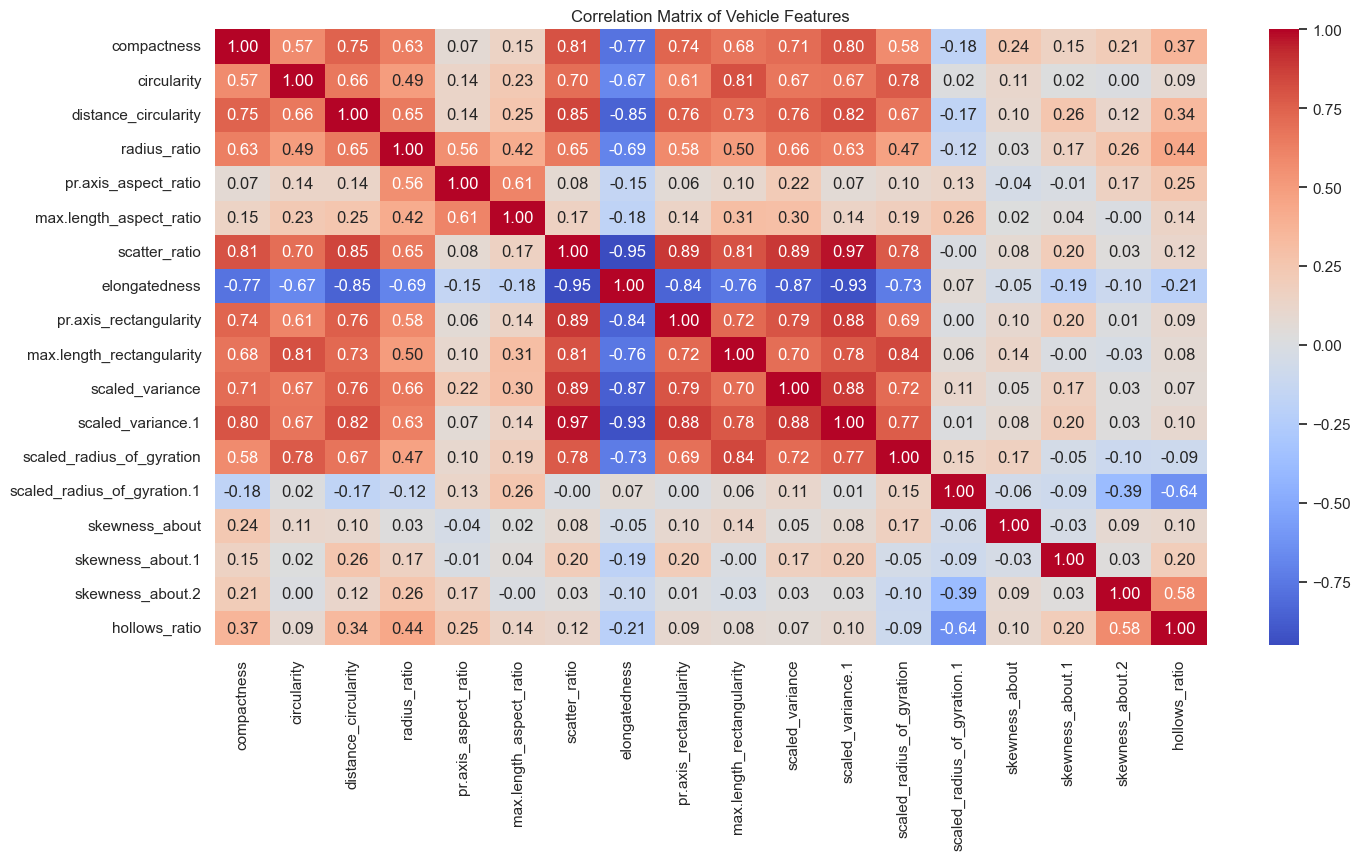

In [140]:
# Compute correlation matrix for weekly products
corr_matrix = df[columns].corr()

# correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Vehicle Features")
plt.show()

In [141]:
Identification and Treatment of Outliers
X = df.drop('class', axis=1)

# Calculate Z-scores
z_scores = np.abs(zscore(X))
outliers = (z_scores > 3)

print(f"Total outliers detected: {np.sum(outliers)}")

Total outliers detected: 69


In [142]:
import pandas as pd
from scipy.stats import zscore

z_scores = pd.DataFrame(zscore(X), columns=X.columns)

# Set a Z-score threshold
threshold = 3

# Boolean DataFrame marking outliers
outliers_bool = (z_scores.abs() > threshold)

# Filter rows with at least one outlier
outliers = X[outliers_bool.any(axis=1)]

# Function to apply color only to outlier cells
def highlight_outliers(val, is_outlier):
    return 'color: red;' if is_outlier else ''

# Apply the styling
styled_outliers = outliers.style.apply(
    lambda row: [highlight_outliers(v, out) for v, out in zip(row, outliers_bool.loc[row.name])],
    axis=1
)

styled_outliers

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
4,85,44.000000,70.000000,205.000000,103.000000,52,149.000000,45.000000,19.000000,144,241.000000,325.000000,188.000000,127.000000,9.000000,11.000000,180.000000,183
5,107,0.000000,106.000000,172.000000,50.000000,6,255.000000,26.000000,28.000000,169,280.000000,957.000000,264.000000,85.000000,5.000000,9.000000,181.000000,183
9,93,44.000000,98.000000,0.000000,62.000000,11,183.000000,36.000000,22.000000,146,202.000000,505.000000,152.000000,64.000000,4.000000,14.000000,195.000000,204
19,101,56.000000,100.000000,215.000000,0.000000,10,208.000000,32.000000,24.000000,169,227.000000,651.000000,223.000000,74.000000,6.000000,5.000000,186.000000,193
35,100,46.000000,0.000000,172.000000,67.000000,9,157.000000,43.000000,20.000000,150,170.000000,363.000000,184.000000,67.000000,17.000000,7.000000,192.000000,200
37,90,48.000000,86.000000,306.000000,126.000000,49,153.000000,44.000000,19.000000,156,272.000000,346.000000,200.000000,118.000000,0.000000,15.000000,185.000000,194
44,119,54.000000,106.000000,220.000000,65.000000,12,213.000000,31.000000,24.000000,167,223.000000,675.000000,232.000000,66.000000,20.000000,1.000000,192.000000,202
66,81,43.000000,68.000000,125.000000,57.000000,8,149.000000,46.000000,19.000000,146,169.000000,323.000000,172.000000,0.000000,0.000000,18.000000,179.000000,184
70,96,55.000000,98.000000,161.000000,54.000000,10,215.000000,31.000000,0.000000,175,226.000000,683.000000,221.000000,76.000000,3.000000,6.000000,185.000000,193
77,86,40.000000,62.000000,140.000000,62.000000,7,150.000000,45.000000,19.000000,133,165.000000,330.000000,173.000000,0.000000,2.000000,3.000000,180.000000,185


In [143]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

In [144]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")

Original shape: (846, 18)
Reduced shape after PCA: (846, 18)


In [145]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {cum_var:.4f})")

PC1: 0.4796 (Cumulative: 0.4796)
PC2: 0.1329 (Cumulative: 0.6126)
PC3: 0.1013 (Cumulative: 0.7139)
PC4: 0.0652 (Cumulative: 0.7791)
PC5: 0.0514 (Cumulative: 0.8305)
PC6: 0.0359 (Cumulative: 0.8665)
PC7: 0.0292 (Cumulative: 0.8957)
PC8: 0.0233 (Cumulative: 0.9190)
PC9: 0.0150 (Cumulative: 0.9340)
PC10: 0.0120 (Cumulative: 0.9460)
PC11: 0.0116 (Cumulative: 0.9575)
PC12: 0.0098 (Cumulative: 0.9673)
PC13: 0.0093 (Cumulative: 0.9766)
PC14: 0.0080 (Cumulative: 0.9846)
PC15: 0.0067 (Cumulative: 0.9913)
PC16: 0.0045 (Cumulative: 0.9958)
PC17: 0.0032 (Cumulative: 0.9989)
PC18: 0.0011 (Cumulative: 1.0000)


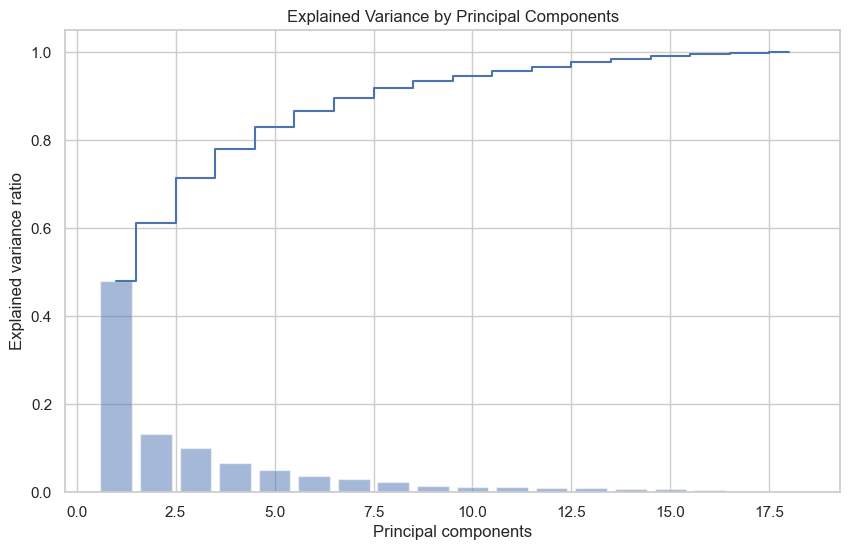

Cumulative explained variance:
[0.47964097 0.61256927 0.71389865 0.77910427 0.83054807 0.86647171
 0.89566039 0.91899427 0.9339996  0.94595696 0.95752853 0.96730243
 0.97657746 0.98462269 0.99131106 0.99577917 0.99893534 1.        ]


In [146]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.show()

# Print cumulative explained variance
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

In [147]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")

Original shape: (846, 18)
Reduced shape after PCA: (846, 3)


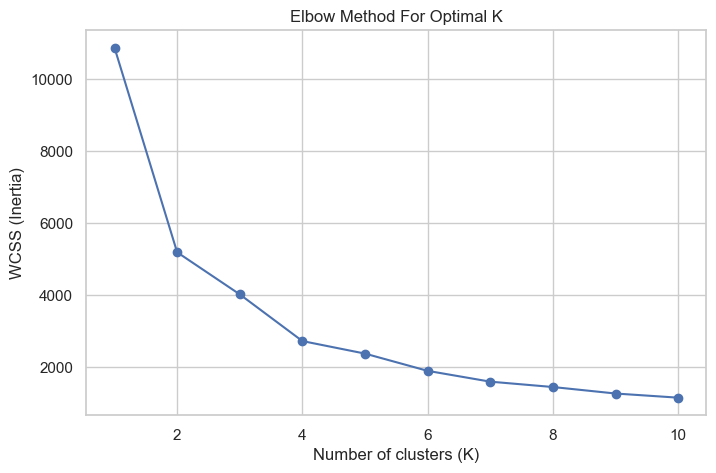

In [149]:
# Find optimal number of clusters using the Elbow Method
wcss = [] 
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [150]:
# Choose the optimal K
optimal_k = 4  # Example: Based on Elbow graph, pick 3, 4, or 5 — you decide from plot
print(f"Optimal K (chosen manually after seeing elbow curve): {optimal_k}")

Optimal K (chosen manually after seeing elbow curve): 4


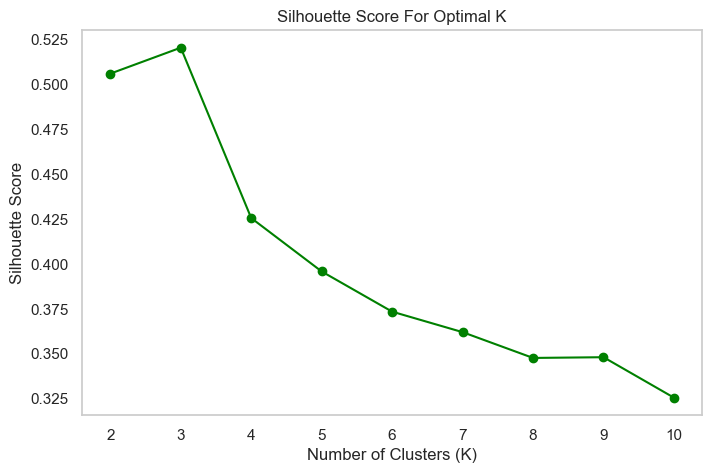

In [151]:
# Silhouette Score Method
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, preds))

# Plot Silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [152]:
# Select the best K (either from elbow curve or silhouette)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nOptimal K based on Silhouette Score: {optimal_k}")


Optimal K based on Silhouette Score: 3


# K-means Clustering

In [153]:
# kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final = KMeans(n_clusters=3,
               random_state=42,
               n_init=30,
               init='k-means++')

clusters = kmeans_final.fit_predict(X_pca)

# Add cluster labels to dataframe
df['KMeans_Cluster'] = clusters

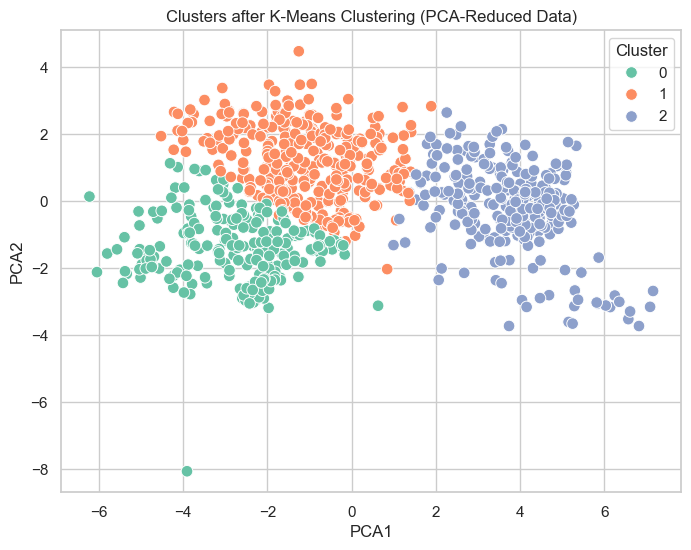

In [154]:
# Plot final clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=70)
plt.title('Clusters after K-Means Clustering (PCA-Reduced Data)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

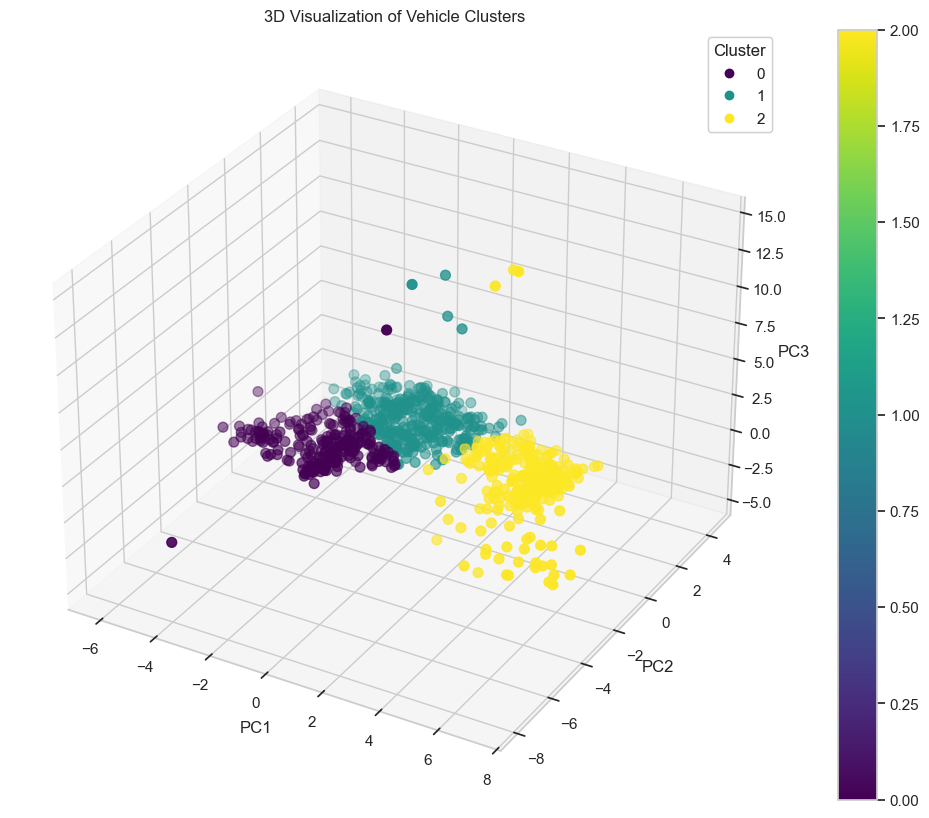

In [156]:
# 3D visualization of clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=df['KMeans_Cluster'], cmap='viridis', s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of Vehicle Clusters')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.colorbar(scatter)
plt.show()

In [157]:
# Step 7: Project Each Original Feature on Principal Component Axes (Feature Importance)

# Get PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a dataframe for loadings
loading_matrix = pd.DataFrame(loadings, index=X.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display feature contributions to first two principal components
print("\nFeature Importance Projection on Principal Components:")
print(loading_matrix[['PC1', 'PC2', 'PC3']])


Feature Importance Projection on Principal Components:
                                  PC1       PC2       PC3
compactness                  0.841682  0.185512 -0.176776
circularity                  0.784461 -0.154069  0.010189
distance_circularity         0.893222  0.128063 -0.080470
radius_ratio                 0.748276  0.341905  0.351728
pr.axis_aspect_ratio         0.218334  0.272391  0.843550
max.length_aspect_ratio      0.299566  0.054622  0.804654
scatter_ratio                0.962544 -0.095501 -0.127986
elongatedness               -0.943842 -0.007344  0.087222
pr.axis_rectangularity       0.881467 -0.102381 -0.141483
max.length_rectangularity    0.859385 -0.200245 -0.002691
scaled_variance              0.900772 -0.122957  0.076381
scaled_variance.1            0.945348 -0.113230 -0.144634
scaled_radius_of_gyration    0.818503 -0.336966 -0.018374
scaled_radius_of_gyration.1 -0.034600 -0.723582  0.444852
skewness_about               0.132420  0.084172 -0.156120
skewness_about.1

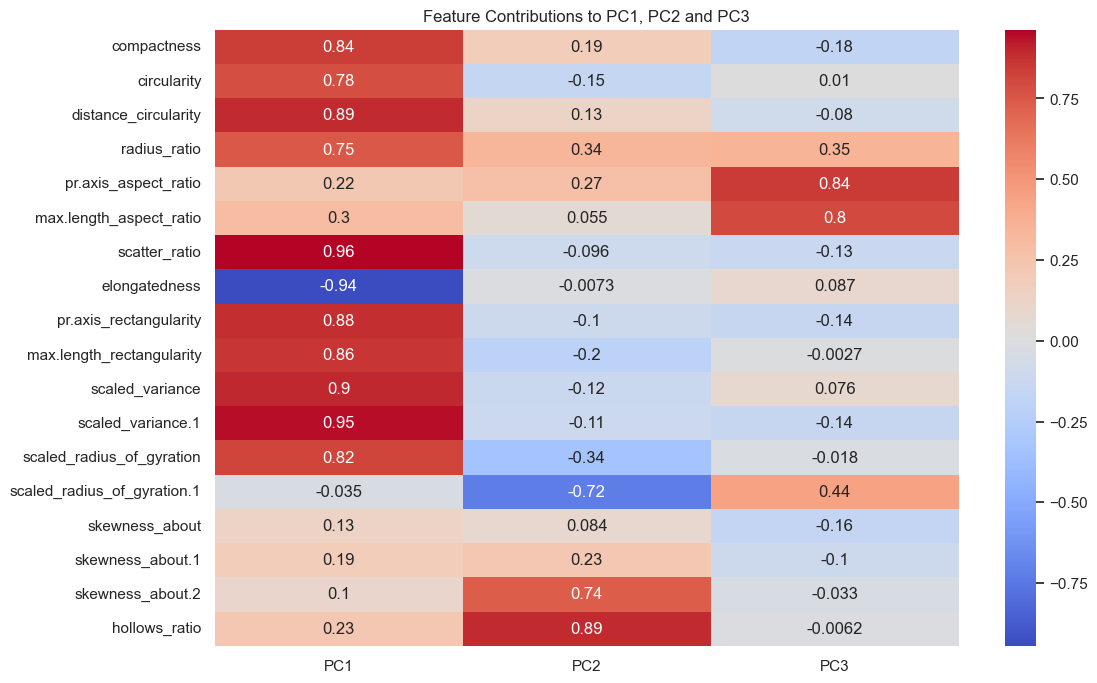

In [159]:
# Plot heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(loading_matrix[['PC1', 'PC2', 'PC3']], annot=True, cmap='coolwarm')
plt.title('Feature Contributions to PC1, PC2 and PC3')
plt.show()

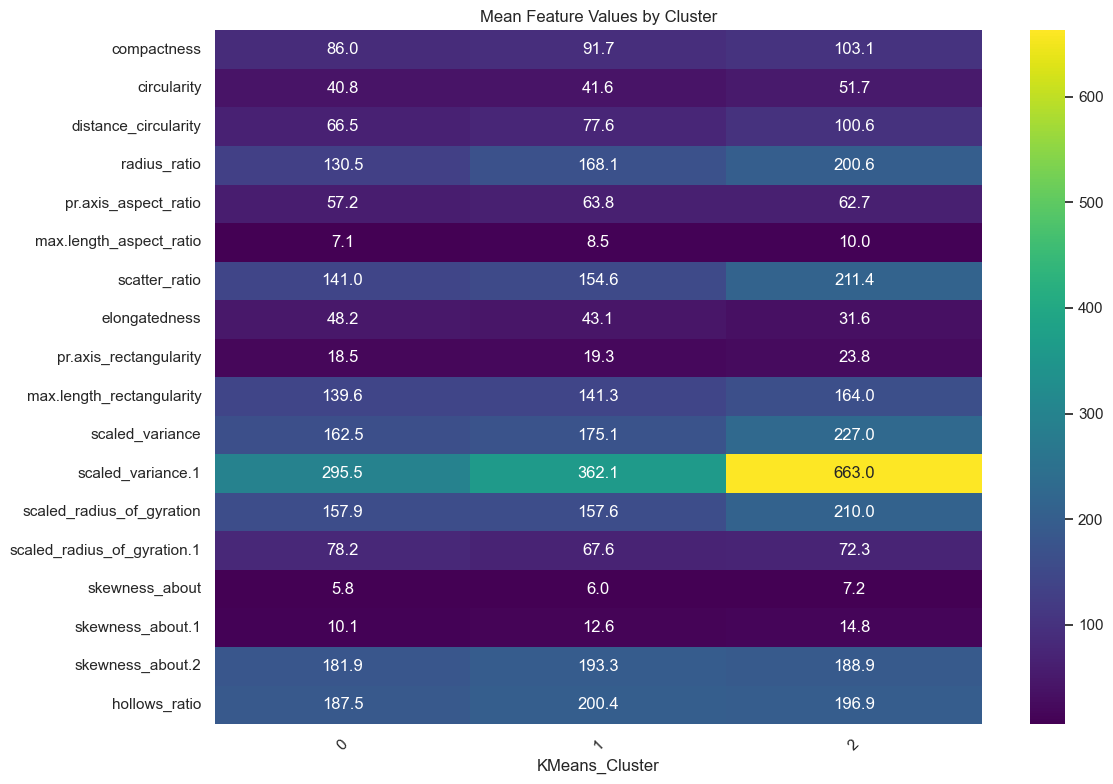

In [163]:
# Cluster Characterization (Fixed)

# First ensure we're only using numeric columns for mean calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# numeric_cols = [col for col in numeric_cols if col != 'Cluster']  # Exclude cluster label if needed

# Calculate mean feature values by cluster
cluster_means = df[numeric_cols].groupby('KMeans_Cluster').mean()

# Visualize cluster means
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt=".1f")
plt.title('Mean Feature Values by Cluster')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [164]:
PCA_components = pd.DataFrame(X_pca)

In [165]:
# Clustering using KMeans
import numpy as np

# kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans_final.fit_predict(X_pca)

# model = KMeans(n_clusters = 3, init = "k-means++")
label = kmeans_final.fit_predict(X_pca)

centers = np.array(kmeans_final.cluster_centers_)
uniq = np.unique(clusters)

In [166]:
# colors for plotting
colors = ['red', 'green', 'orange']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:3])) ]
T=PCA_components.iloc[:,:3]

In [167]:
T

,0,1,2
0,0.348639,0.363109,0.973964
1,-1.446765,0.411181,-0.336309
2,3.664042,-0.152385,0.103857
3,-1.631076,2.431748,-0.014907
4,0.626801,-3.117706,11.437946
...,...,...,...
841,-0.363008,0.645497,0.133045
842,-0.261155,0.021673,0.821051
843,4.631074,0.074310,0.542339
844,-3.111170,0.893510,-0.360927


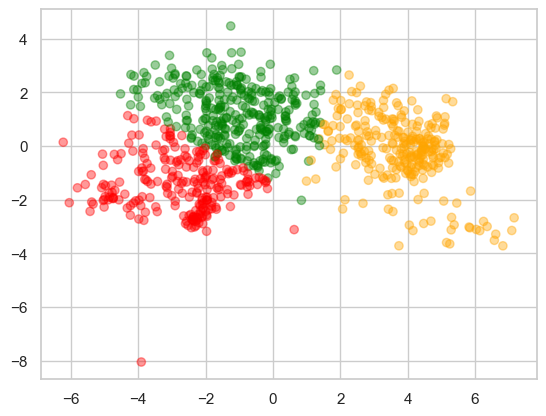

In [168]:
# plot the PCA cluster components
plt.scatter(T[0], T[1],
 c=features_colors, marker='o',
 alpha=0.4
 )

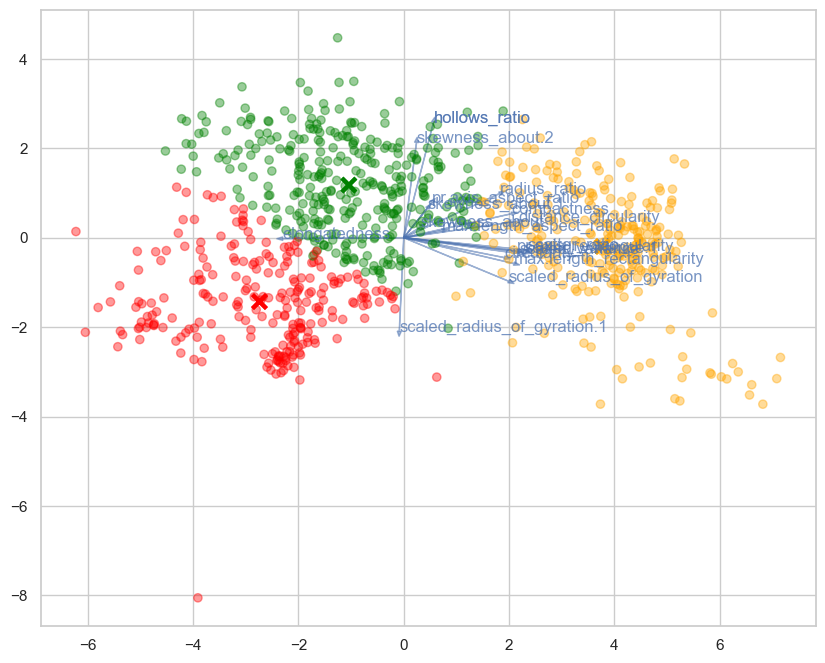

In [169]:
# plot the centroids
plt.figure(figsize=(10,8))
plt.scatter(centers[:, 0], centers[:, 1],
 marker='x', s=100,
 linewidths=3, c=colors
 )
# store the values of PCA component in variable
xvector = pca.components_[0] * max(T[0])
yvector = pca.components_[1] * max(T[1])
columns = df.columns
# plot the 'name of individual features' along with vector length
# for i in range(len(columns)):
#  # plot arrows
#  plt.arrow(0, 0, xvector[i], yvector[i],
#  color='b', width=0.005,
#  head_width=0.08, alpha=0.5
#  )
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.005, head_width=0.08, alpha=0.5)
    plt.text(xvector[i], yvector[i], columns[i], color='b', alpha=0.75)

 # plot name of features
plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)
plt.scatter(T[0], T[1],
 c=features_colors, marker='o',
 alpha=0.4)
#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
 marker='x', s=100,
 linewidths=3, c=colors )
plt.show()

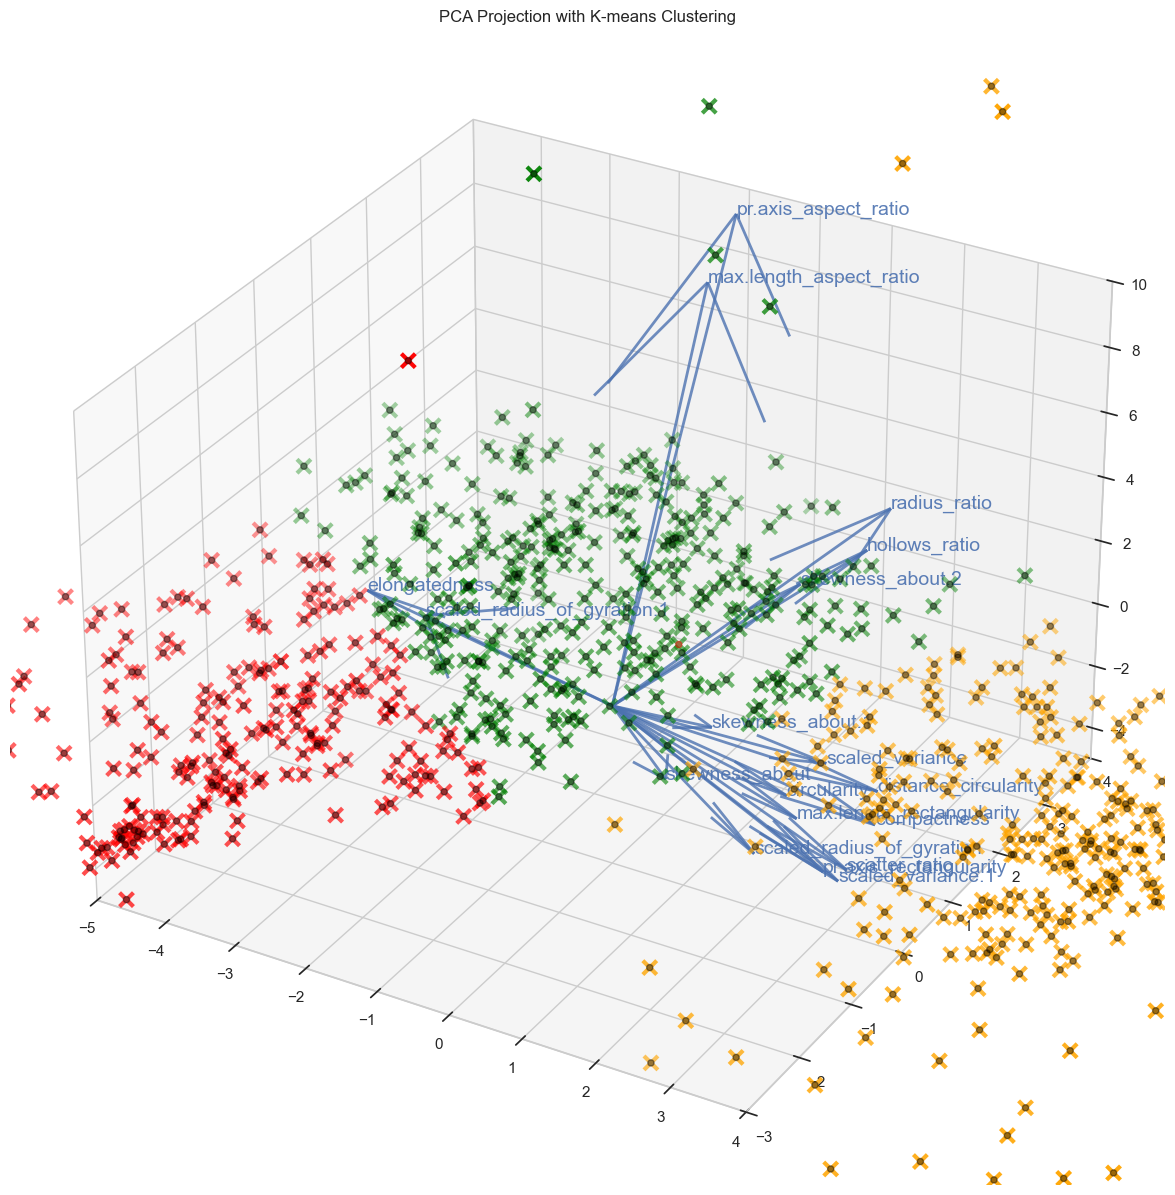

In [171]:
# Define color map for 3 clusters only
cluster_color_map = {0: 'red', 1: 'green', 2: 'orange'}
default_color = 'black'  # For any unexpected cluster labels

# Assign colors explicitly to cluster labels
labels = df['KMeans_Cluster'].values
colors_mapped = [cluster_color_map.get(label, default_color) for label in labels]

# Scale PCA and feature vector positions
scaling_factor = 1.5
X_pca_scaled = X_pca * scaling_factor
T_scaled = PCA_components.iloc[:, :3] * scaling_factor

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot PCA points with cluster-based colors
ax.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], X_pca_scaled[:, 2],
           c=colors_mapped, marker='x', s=100, linewidths=3)

# Feature component markers (e.g., PC directions)
feature_colors = [cluster_color_map.get(label, default_color) for label in range(len(T_scaled))]
ax.scatter(T_scaled[0], T_scaled[1], T_scaled[2], c=feature_colors, marker='o', alpha=0.4)

# Plot feature vectors (arrows from origin)
n_features = pca.components_.shape[1]
feature_columns = df.columns[:n_features]

xvector = pca.components_[0] * max(T_scaled[0])
yvector = pca.components_[1] * max(T_scaled[1])
zvector = pca.components_[2] * max(T_scaled[2])

for i in range(n_features):
    ax.quiver(0, 0, 0, xvector[i], yvector[i], zvector[i],
              color='b', alpha=0.8, linewidth=2)
    ax.text(xvector[i], yvector[i], zvector[i], feature_columns[i],
            color='b', alpha=0.9, fontsize=14)

# Axis limits
ax.set_xlim([-5, 4])
ax.set_ylim([-3, 4])
ax.set_zlim([-5, 10])

plt.title('PCA Projection with K-means Clustering', fontsize=12)
plt.show()

In [172]:
cross_tab = pd.crosstab(df['KMeans_Cluster'], df['class'])
print("Initial Cluster-Class Alignment:")
print(cross_tab)

Initial Cluster-Class Alignment:
class           bus  car  van
KMeans_Cluster               
0                82   77   82
1                86  137  114
2                50  215    3


In [173]:
print(df['KMeans_Cluster'].value_counts())

KMeans_Cluster
1    337
2    268
0    241
Name: count, dtype: int64


# Agglomerative Clustering

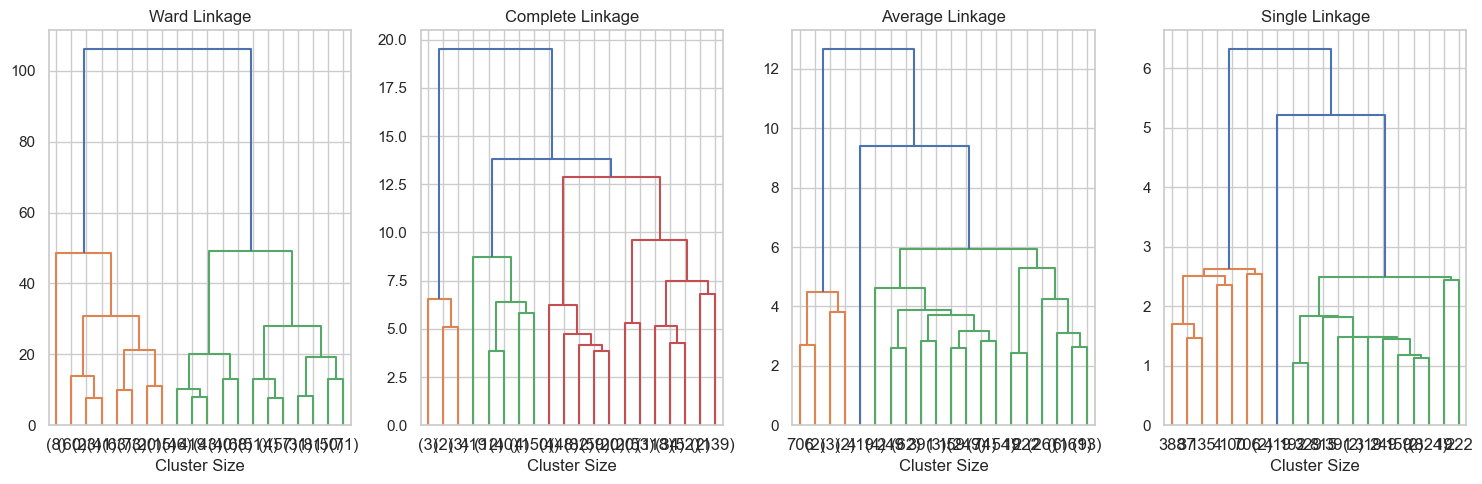

In [174]:
# Calculate linkage matrix
methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(15, 5))

for i, method in enumerate(methods, 1):
    plt.subplot(1, 4, i)
    Z = linkage(X_pca, method=method)
    dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
    plt.title(f"{method.capitalize()} Linkage")
    plt.xlabel('Cluster Size')

plt.tight_layout()
plt.show()

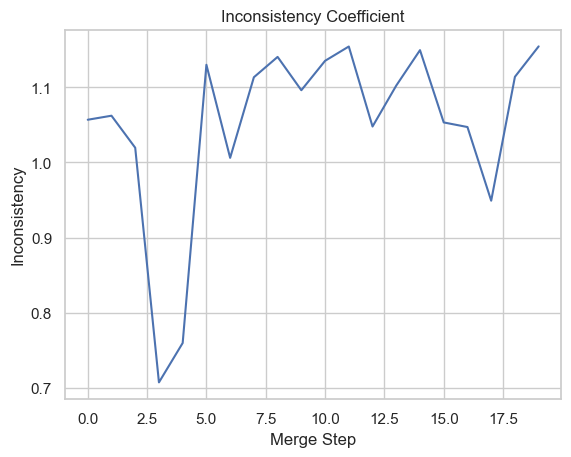

Identified 3 clusters


In [175]:
# Calculate linkage
Z = linkage(X_pca, method='ward')

# Calculate inconsistency coefficients
from scipy.cluster.hierarchy import inconsistent
inconsistency = inconsistent(Z)
plt.plot(inconsistency[-20:, 3])  # Plot last 20 merges
plt.title('Inconsistency Coefficient')
plt.xlabel('Merge Step')
plt.ylabel('Inconsistency')
plt.show()

# Automated selection using inconsistency
from scipy.cluster.hierarchy import fcluster
max_d = 49 # From dendrogram inspection
clusters = fcluster(Z, max_d, criterion='distance')
print(f"Identified {len(np.unique(clusters))} clusters")

Last 10 merges (step and distance):
Step 844: distance = 106.08
Step 843: distance = 49.18
Step 842: distance = 48.46
Step 841: distance = 30.92
Step 840: distance = 28.01
Step 839: distance = 21.11
Step 838: distance = 20.11
Step 837: distance = 19.27
Step 836: distance = 13.91
Step 835: distance = 13.15
Step 834: distance = 13.15
Step 833: distance = 12.95
Step 832: distance = 11.07
Step 831: distance = 10.10
Step 830: distance = 9.91
Step 829: distance = 8.34
Step 828: distance = 8.04
Step 827: distance = 7.76
Step 826: distance = 7.74
Step 825: distance = 7.72


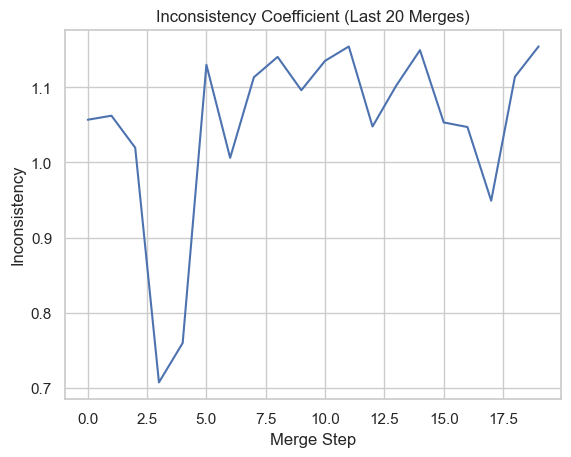


Trying different max_d values to find best cluster count:
max_d = 45 --> 4 clusters
max_d = 46 --> 4 clusters
max_d = 47 --> 4 clusters
max_d = 48 --> 4 clusters
max_d = 49 --> 3 clusters
max_d = 50 --> 2 clusters

✅ Selected max_d = 49 (3 clusters)
Adjusted Rand Index (ARI): 0.11860833204771891
Silhouette Score: 0.3905030024068555


In [176]:
Z = linkage(X_pca, method='ward')

# View the last few merge distances
print("Last 10 merges (step and distance):")
for i in range(-1, -21, -1):
    print(f"Step {len(Z) + i}: distance = {Z[i, 2]:.2f}")

# Plot inconsistency
inconsistency_vals = inconsistent(Z)
plt.plot(inconsistency_vals[-20:, 3])
plt.title("Inconsistency Coefficient (Last 20 Merges)")
plt.xlabel("Merge Step")
plt.ylabel("Inconsistency")
plt.show()

# Try various distance thresholds
print("\nTrying different max_d values to find best cluster count:")
candidate_distances = [45,46,47,48,49,50]
best_d = None

for d in candidate_distances:
    clusters = fcluster(Z, d, criterion='distance')
    n_clusters = len(np.unique(clusters))
    print(f"max_d = {d} --> {n_clusters} clusters")
    if n_clusters == 3 and best_d is None:
        best_d = d 

# Final clusters using best_d
if best_d is not None:
    print(f"\n✅ Selected max_d = {best_d} (3 clusters)")
    final_clusters = fcluster(Z, best_d, criterion='distance')
    
    # Evaluate against ground truth
    try:
        print("Adjusted Rand Index (ARI):", adjusted_rand_score(df['class'], final_clusters))
        print("Silhouette Score:", silhouette_score(X_pca, final_clusters))
    except:
        print("Ground truth labels not provided, skipping evaluation.")
else:
    print("\n❌ Couldn't find a distance that gives exactly 3 clusters.")

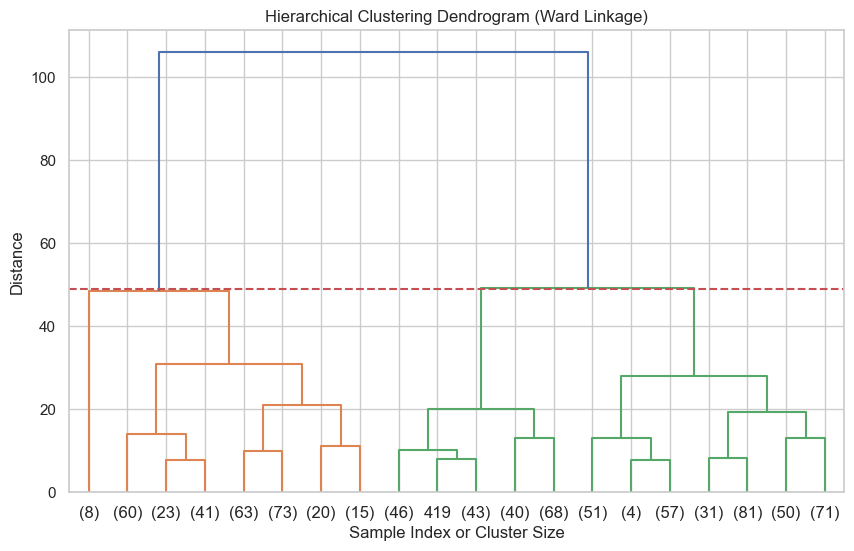

In [177]:
# Select best linkage method
best_method = 'ward'
Z = linkage(X_pca, method=best_method)

# Plot detailed dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=49, color='r', linestyle='--')
plt.show()

In [178]:
# Perform clustering with selected parameters
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_pca)

# Add to dataframe
df_clustered = X.copy()
df_clustered['Cluster'] = cluster_labels
df_clustered['Class'] = df['class']

# Compare with true classes
cross_tab = pd.crosstab(df_clustered['Cluster'], df_clustered['Class'])
print("Cluster-Class Alignment:")
print(cross_tab)

Cluster-Class Alignment:
Class    bus  car  van
Cluster               
0         60  235    8
1         75  128  142
2         83   66   49


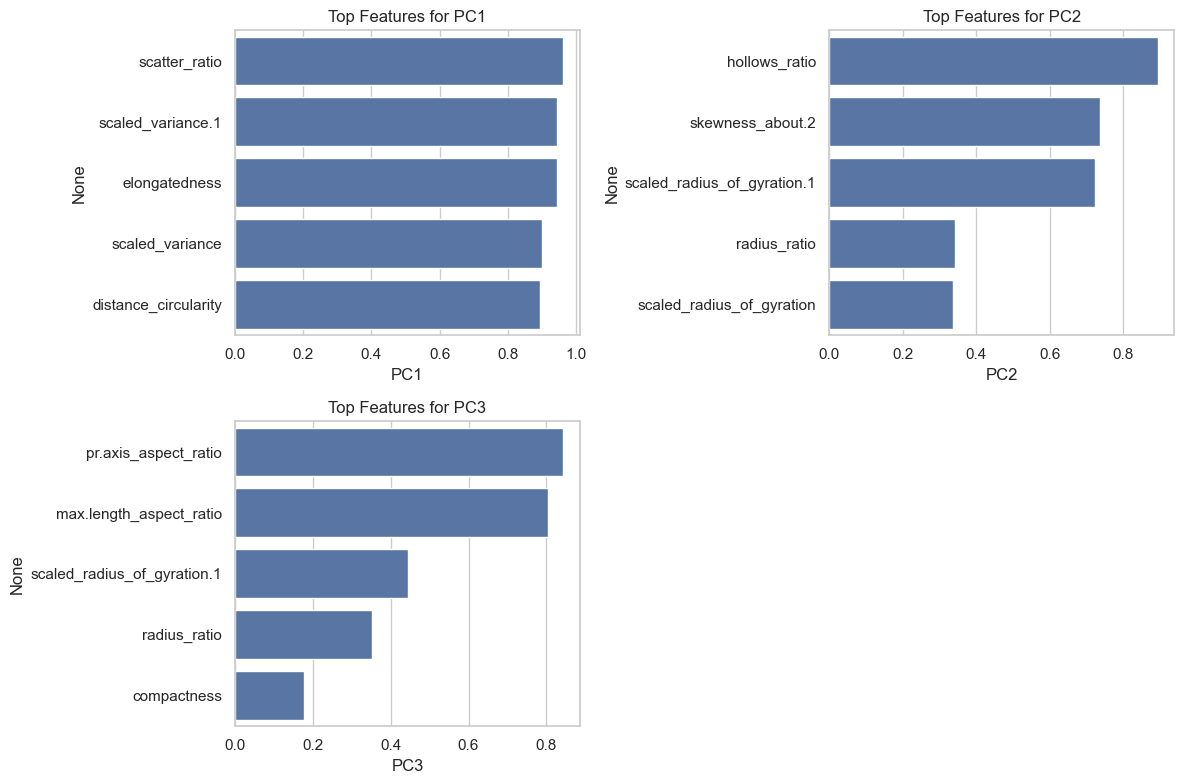

In [179]:
# Create feature importance dataframe
loadings = pd.DataFrame(
    pca.components_.T* np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns
)

pca.components_.T * np.sqrt(pca.explained_variance_)

# Visualize top features for each PC
plt.figure(figsize=(12, 8))
top_n = 5
for i, pc in enumerate(loadings.columns[:4]):
    plt.subplot(2, 2, i+1)
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    sns.barplot(x=sorted_loadings.head(top_n), y=sorted_loadings.head(top_n).index)
    plt.title(f'Top Features for {pc}')
    plt.tight_layout()

plt.show()

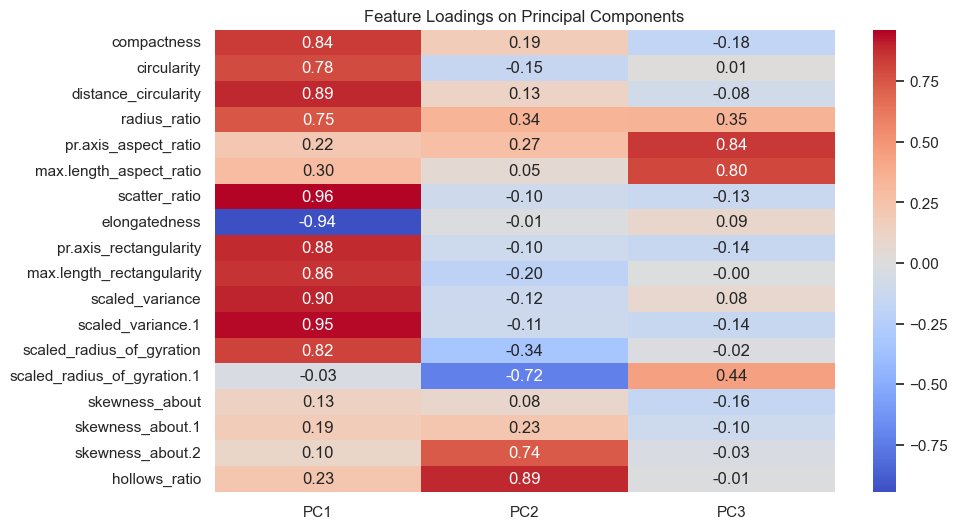

In [180]:
# Heatmap of all feature loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Feature Loadings on Principal Components')
plt.show()

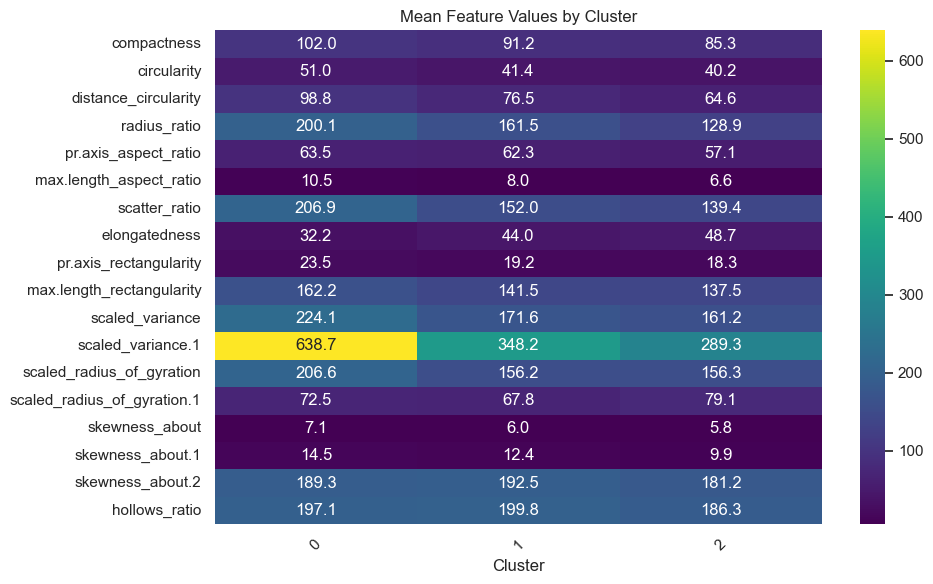

In [181]:
# Cluster Characterization
numeric_cols = df_clustered.select_dtypes(include=[np.number]).columns.tolist()
# numeric_cols = [col for col in numeric_cols if col != 'Cluster']  # Exclude cluster label if needed

# Calculate mean feature values by cluster
cluster_means = df_clustered[numeric_cols].groupby('Cluster').mean()

# Visualize cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt=".1f")
plt.title('Mean Feature Values by Cluster')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [182]:
# Top distinguishing features per cluster
top_features = {}
for cluster in sorted(df_clustered['Cluster'].unique()):
    # Get mean values for this cluster
    cluster_vals = cluster_means.loc[cluster]
    
    # Get mean values for all other clusters
    other_vals = cluster_means[cluster_means.index != cluster].mean()
    
    # Calculate how much each feature distinguishes this cluster
    diff = (cluster_vals - other_vals).abs().sort_values(ascending=False)
    top_features[f'Cluster {cluster}'] = diff.head(5).index.tolist()

print("\nTop Distinguishing Features per Cluster:")
for cluster, features in top_features.items():
    print(f"{cluster}: {', '.join(features)}")


Top Distinguishing Features per Cluster:
Cluster 0: scaled_variance.1, scatter_ratio, scaled_variance, radius_ratio, scaled_radius_of_gyration
Cluster 1: scaled_variance.1, scaled_radius_of_gyration, scatter_ratio, scaled_variance, max.length_rectangularity
Cluster 2: scaled_variance.1, radius_ratio, scatter_ratio, scaled_variance, scaled_radius_of_gyration


In [74]:
# Add class distribution per cluster
if 'Class' in df_clustered.columns:
    print("\nClass Distribution per Cluster:")
    print(pd.crosstab(df_clustered['Cluster'], df_clustered['Class']))


Class Distribution per Cluster:
Class    bus  car  van
Cluster               
0         60  235    8
1         75  128  142
2         83   66   49


In [75]:
# colors for plotting
colors = ['red', 'green', 'orange']
# assign a color to each features 
features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:3])) ]
T=PCA_components.iloc[:,:3]

In [76]:
df_clustered['Cluster'].unique()

array([1, 0, 2], dtype=int64)

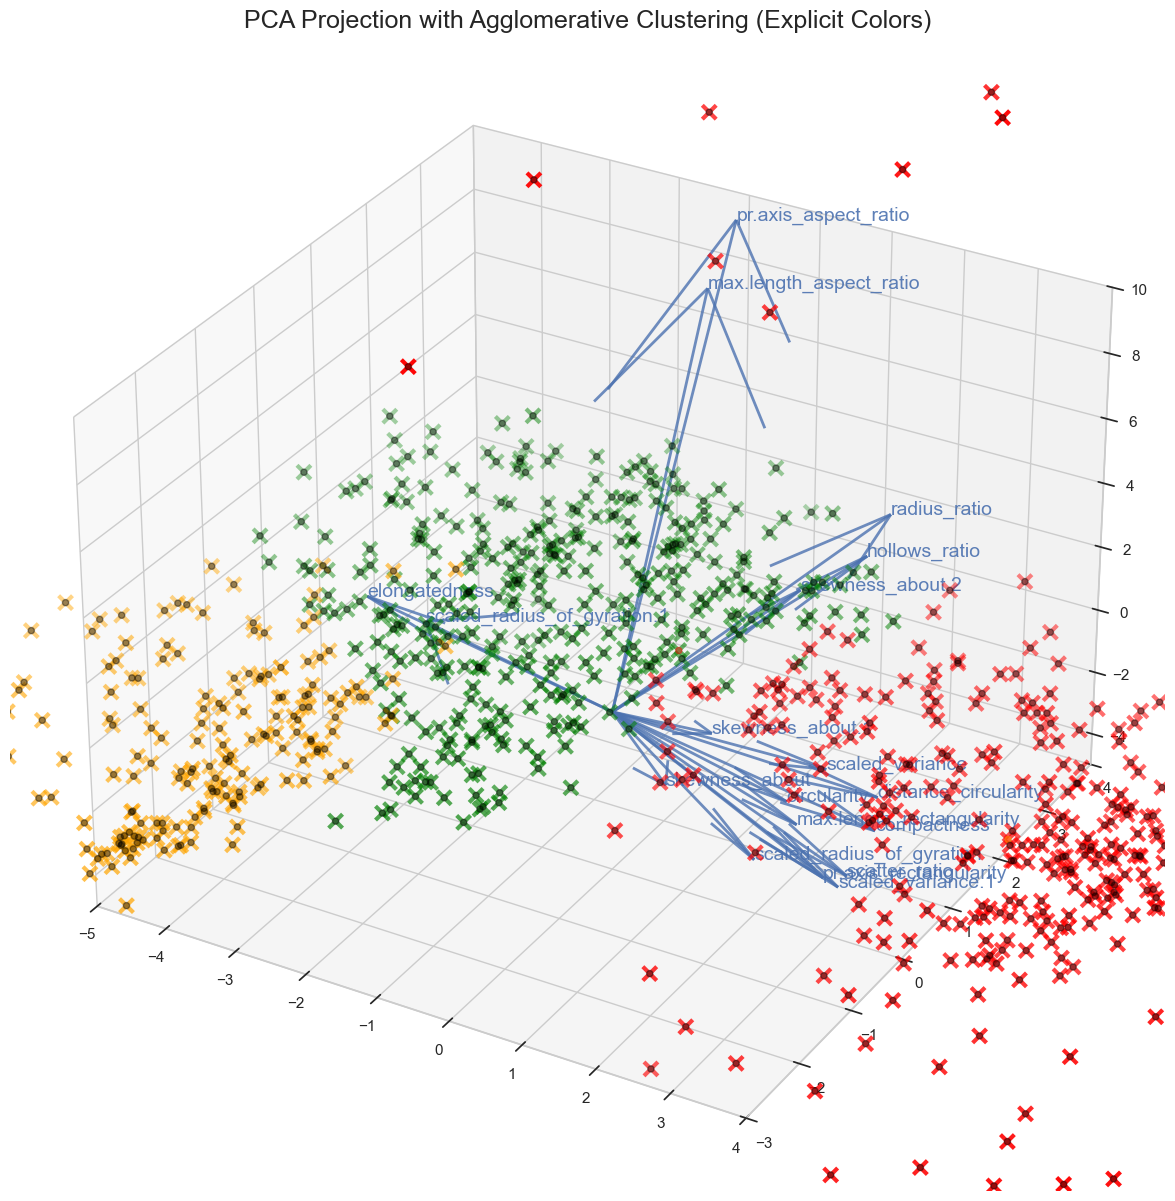

In [184]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define color map for 3 clusters only
cluster_color_map = {0: 'red', 1: 'green', 2: 'orange'}
default_color = 'black'  # For any unexpected cluster labels

# Assign colors explicitly to cluster labels
labels = df_clustered['Cluster'].values
colors_mapped = [cluster_color_map.get(label, default_color) for label in labels]

# Scale PCA and feature vector positions
scaling_factor = 1.5
X_pca_scaled = X_pca * scaling_factor
T_scaled = PCA_components.iloc[:, :3] * scaling_factor

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot PCA points with cluster-based colors
ax.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], X_pca_scaled[:, 2],
           c=colors_mapped, marker='x', s=100, linewidths=3)

# Feature component markers
feature_colors = [cluster_color_map.get(label, default_color) for label in range(len(T_scaled))]
ax.scatter(T_scaled[0], T_scaled[1], T_scaled[2], c=feature_colors, marker='o', alpha=0.4)

# Plot feature vectors
n_features = pca.components_.shape[1]
feature_columns = df.columns[:n_features]

xvector = pca.components_[0] * max(T_scaled[0])
yvector = pca.components_[1] * max(T_scaled[1])
zvector = pca.components_[2] * max(T_scaled[2])

for i in range(n_features):
    ax.quiver(0, 0, 0, xvector[i], yvector[i], zvector[i],
              color='b', alpha=0.8, linewidth=2)
    ax.text(xvector[i], yvector[i], zvector[i], feature_columns[i],
            color='b', alpha=0.9, fontsize=14)

# Axis limits
ax.set_xlim([-5, 4])
ax.set_ylim([-3, 4])
ax.set_zlim([-5, 10])

plt.title('PCA Projection with Agglomerative Clustering (Explicit Colors)', fontsize=18)
plt.show()

In [185]:
print(df_clustered['Cluster'].value_counts())

Cluster
1    345
0    303
2    198
Name: count, dtype: int64
